In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob
import pickle
import nibabel as nib

from utils import TWO_STAGE_GLM_DATA_DIR


In [88]:
MODE = "train"
SUBJECT = "sub-01"
fmri_addresses_regex = os.path.join(TWO_STAGE_GLM_DATA_DIR, SUBJECT, f'betas_{MODE}*', '*.nii')
fmri_betas_addresses = np.array(sorted(glob(fmri_addresses_regex)))
fmri_betas_address = fmri_betas_addresses[0]

brain_mask_address = os.path.join(os.path.join(TWO_STAGE_GLM_DATA_DIR, SUBJECT), f'unstructured', 'mask.nii')
brain_mask = nib.load(brain_mask_address)
brain_mask = brain_mask.get_fdata().reshape(-1)
brain_mask = np.logical_and(np.logical_not(np.isnan(brain_mask)), brain_mask != 0)
brain_mask.mean()

0.30278981622136836

In [44]:
def show_slices(slices):

   """ Function to display row of image slices """

   fig, axes = plt.subplots(1, len(slices))

   for i, slice in enumerate(slices):

       axes[i].imshow(slice.T, cmap="gray", origin="lower")


/home/mitja/data/multimodal_decoding/fmri/glm_manual/two-stage-mni/sub-01/betas_train_captions/beta_C000139.nii


(76, 76, 93)

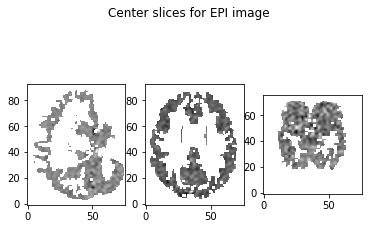

In [81]:
print(fmri_betas_address)
img = nib.load(fmri_betas_address)
img_data = img.get_fdata()

slice_0 = img_data[26, :, :]
slice_1 = img_data[:, 30, :]
slice_2 = img_data[:, :, 16]

show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for EPI image") 

img_data[~np.isnan(img_data)].min()
img_data.shape

In [77]:
from nibabel.affines import apply_affine
center = (np.array(img_data.shape) - 1) / 2.
apply_affine(img.affine, center)

array([ -1., -17.,  10.])

In [72]:
(np.array(img_dta.shape) - 1) / 2.

array([37.5, 37.5, 46. ])

In [75]:
(np.array(img_data.shape) - 1) / 2.

array([37.5, 37.5, 46. ])

In [83]:
print(img.header.get_zooms())

(2.0, 2.0, 2.0)
